## Medication Demand Forecast using Prophet Part I

In [3]:
!pip3 install prophet

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import prophet
from prophet import Prophet

In [5]:
df_pharmacy_sales = pd.read_csv('../demo_pharmacy_sales_data.csv')
df_pharmacy_sales

,Date Sold,Med_name,Med_class,Quantity Sold,Price
0,2021-05-07,Clotrimazole Topical Cream (2%),Antifungal,66,86.9
1,2021-08-09,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,15,22.9
2,2021-06-15,Methyltestosterone Tablet (10 mg),Androgen Hormone,5,5.9
3,2021-02-19,Buspirone Tablet (5 mg),Anxiolytic,89,55.7
4,2022-09-24,Hydrocodone/Acetaminophen Tablet (5/325 mg),Opioid Analgesic/Analgesic Combination,79,0.7
...,...,...,...,...,...
999995,2020-11-29,Alprostadil Urethral Suppository (125 mcg),Prostaglandin E1 Analog,34,58.0
999996,2021-03-30,Fenoprofen Tablet (600 mg),Nonsteroidal Anti-Inflammatory Drug,12,98.3
999997,2020-04-17,Doxazosin Tablet (1 mg),Alpha-Blocker,83,10.3
999998,2021-12-08,Flumazenil Injection (0.1 mg/mL),Benzodiazepine Antagonist,1,23.9


In [6]:
df_pharmacy_sales[df_pharmacy_sales['Med_class'].str.contains('Anxiolytic')][['Date Sold', 'Quantity Sold']]

,Date Sold,Quantity Sold
3,2021-02-19,89
122,2022-03-01,82
143,2020-08-11,17
327,2020-12-08,86
518,2019-03-31,70
...,...,...
999594,2019-08-11,42
999711,2020-05-16,71
999772,2019-09-02,63
999883,2019-09-09,38


In [7]:
df_prophet = df_pharmacy_sales[df_pharmacy_sales['Med_class'].str.contains('Anxiolytic')][['Date Sold', 'Quantity Sold']]

In [8]:
df_prophet = df_prophet.reset_index()
df_prophet

,index,Date Sold,Quantity Sold
0,3,2021-02-19,89
1,122,2022-03-01,82
2,143,2020-08-11,17
3,327,2020-12-08,86
4,518,2019-03-31,70
...,...,...,...
9999,999594,2019-08-11,42
10000,999711,2020-05-16,71
10001,999772,2019-09-02,63
10002,999883,2019-09-09,38


In [9]:
df_prophet = df_prophet.rename(columns={'Date Sold': 'ds','Quantity Sold':'y'})
df_prophet

,index,ds,y
0,3,2021-02-19,89
1,122,2022-03-01,82
2,143,2020-08-11,17
3,327,2020-12-08,86
4,518,2019-03-31,70
...,...,...,...
9999,999594,2019-08-11,42
10000,999711,2020-05-16,71
10001,999772,2019-09-02,63
10002,999883,2019-09-09,38


In [10]:
type(df_prophet['ds'][0])

str

In [11]:
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

In [12]:
type(df_prophet['ds'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
model = Prophet()

In [14]:
model.fit(df_prophet)

13:38:21 - cmdstanpy - INFO - Chain [1] start processing
13:38:21 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

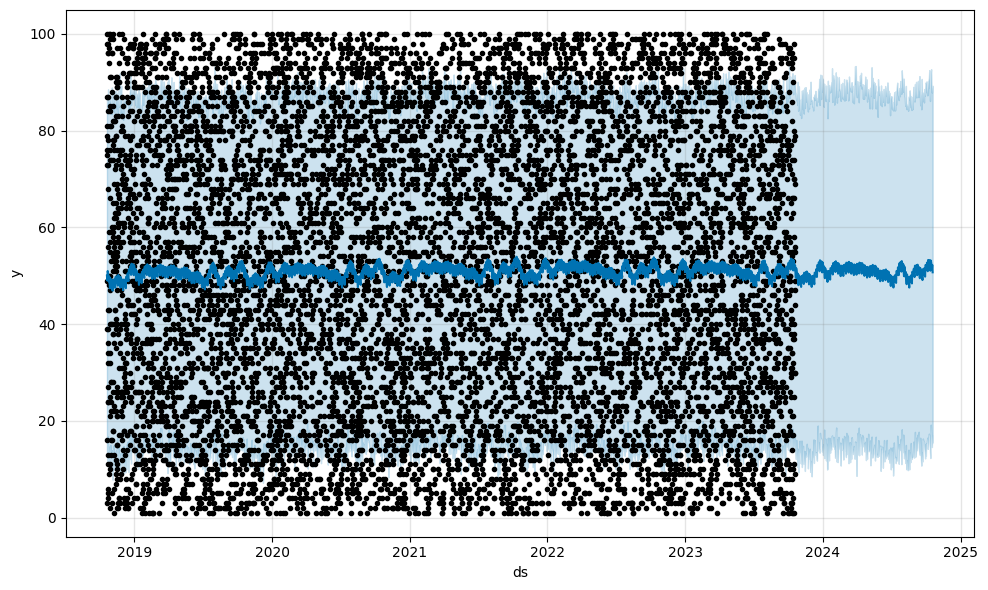

In [16]:
fig = model.plot(forecast)
plt.show()

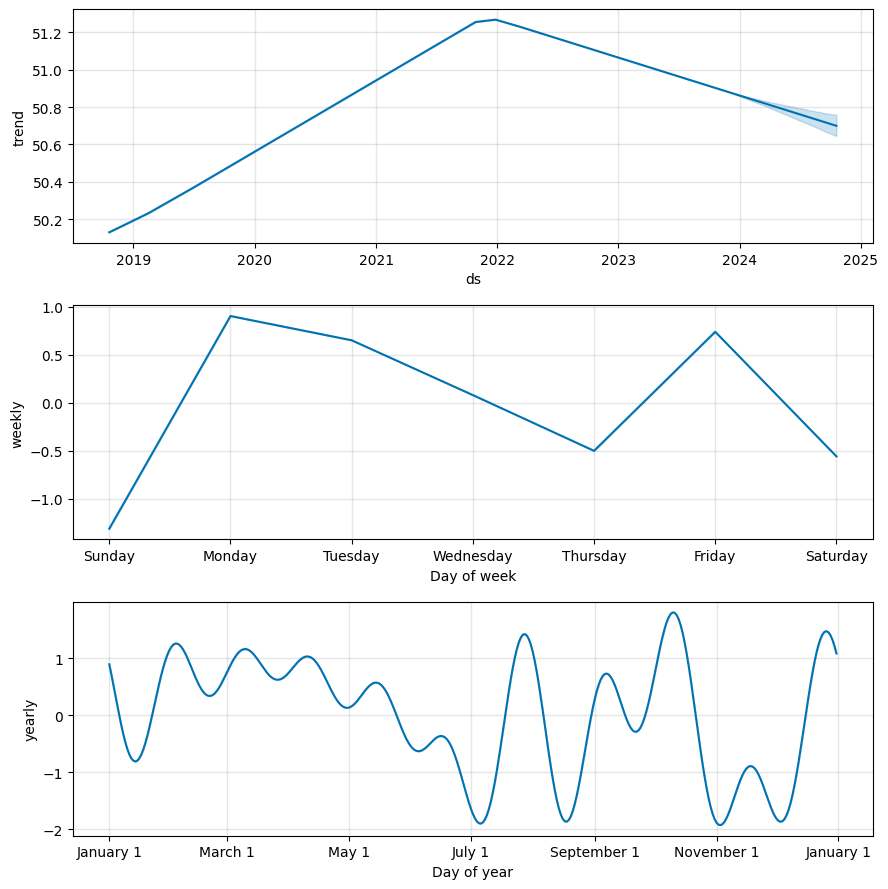

In [17]:
fig = model.plot_components(forecast)
plt.show()

##Medication Demand Forecast using Prophet Part II

In [18]:
def medication_quantity_forecaster(df,med_class=None,med_name=None):
    if med_class:
        df_filtered = df[df['Med_class'].str.contains(med_class)]
    elif med_name:
        df_filtered = df[df['Med_name'].str.contains(med_name)]
    else:
        raise ValueError("Specify either med_name or med_class for filtering")

    df_filtered = df_filtered[['Date Sold','Quantity Sold']].copy()
    df_filtered = df_filtered.reset_index()
    df_filtered = df_filtered.rename(columns={'Date Sold':'ds','Quantity Sold':'y'})
    df_filtered['ds'] = pd.to_datetime(df_filtered['ds'])

    model = Prophet()
    model.fit(df_filtered)

    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    fig1 = model.plot(forecast)
    plt.title(f"Medication Quantity Forecast({med_class or med_name})")
    plt.xlabel("Date")
    plt.ylabel("Quantity Sold")
    plt.show()

    fig2 = model.plot_components(forecast)
    plt.show()

    return fig1, fig2




13:38:23 - cmdstanpy - INFO - Chain [1] start processing
13:38:23 - cmdstanpy - INFO - Chain [1] done processing


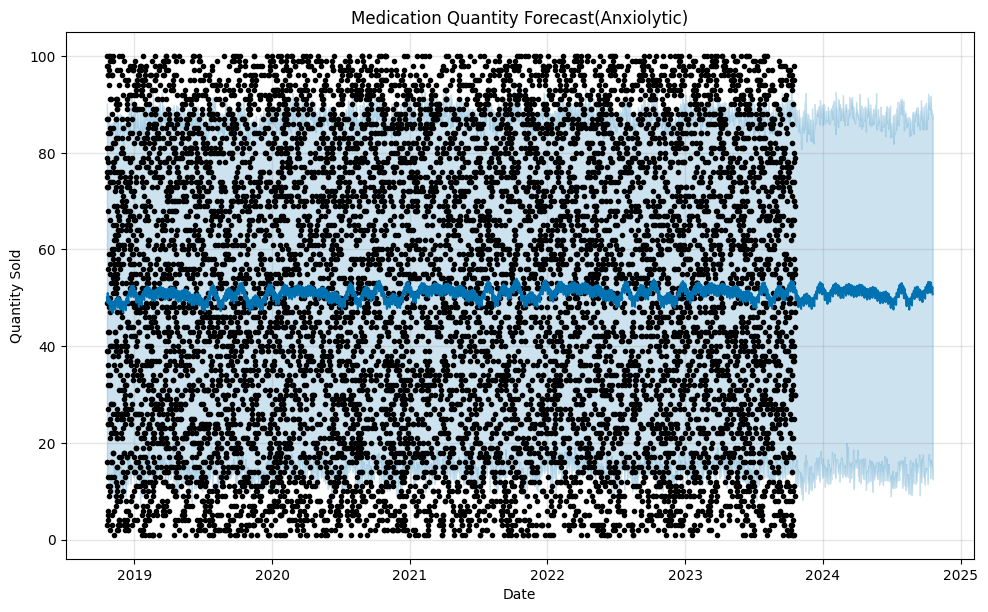

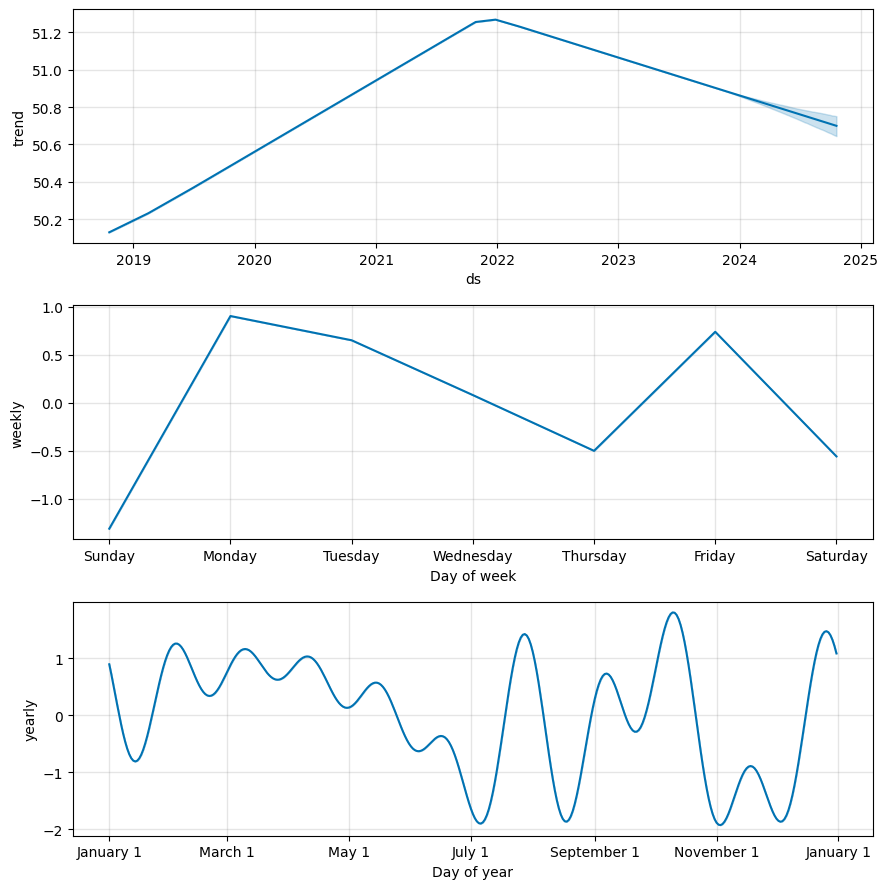

(<Figure size 1000x600 with 1 Axes>, <Figure size 900x900 with 3 Axes>)

In [19]:
medication_quantity_forecaster(df_pharmacy_sales, med_class='Anxiolytic')